In [29]:
import tensorflow as tf

In [30]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [31]:
x_train[0].shape

(28, 28)

In [32]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [33]:
x_train[0].shape

(28, 28, 1)

In [34]:
model = tf.keras.models.Sequential([

  # Deep Learning Part:                                     # 28x28
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),    # 26x26
  tf.keras.layers.Conv2D(40, (5, 5), activation='relu'),    # 22x22
  tf.keras.layers.Conv2D(25, (3, 3), activation='relu'),    # 20x20
  tf.keras.layers.Conv2D(10, (5, 5), activation='relu'),    # 16x16
  tf.keras.layers.MaxPooling2D(),                           # 8x8
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),    # 6x6
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),    # 4x4
  tf.keras.layers.MaxPooling2D(),                           # 2x2
  tf.keras.layers.Flatten(),                                # 1x4

  # Machine Learning Part
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
output = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 313s 167ms/step - accuracy: 0.9904 - loss: 0.0289
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 314s 167ms/step - accuracy: 0.9924 - loss: 0.0247
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 320s 166ms/step - accuracy: 0.9927 - loss: 0.0238
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 314s 167ms/step - accuracy: 0.9931 - loss: 0.0211
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 322s 168ms/step - accuracy: 0.9943 - loss: 0.0172


In [42]:
loss, accuracy = model.evaluate(x_test,  y_test)
print("test loss:" , loss)
print("test accuracy:" ,accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.9889 - loss: 0.0355
test loss: 0.028801044449210167
test accuracy: 0.9914000034332275


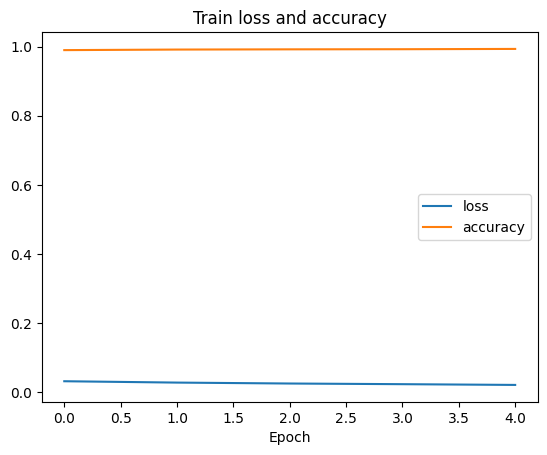

In [43]:
import matplotlib.pyplot as plt


plt.plot(output.history["loss"], label='loss')
plt.plot(output.history["accuracy"], label='accuracy')
plt.title("Train loss and accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()